# Análisis de Componentes Principales

In [1]:
#Lectura de las librerías

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#Carga de la información

df_train_PCA = pd.read_csv('train_clean.csv', na_values=".", sep=",")
print(df_train_PCA.shape)
df_train_PCA.head(5)

(891, 10)


,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [4]:
df_train_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    int64  
 6   Embarked_Q  891 non-null    int64  
 7   Embarked_S  891 non-null    int64  
 8   Pclass_2    891 non-null    int64  
 9   Pclass_3    891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


Teniendo en cuenta la información con la que se estimará el modelo, el siguente paso es **normalizar** los datos asociados a las variables explicativas. Es importante mencionar que el Análisis de Componentes Principales es un algoritmo que se enfoca en el cálculo de distancias entre puntos, por tanto es sensible a las diferentes escalas en las que se puedan encontrar las variables. Para esta oportunidad, se llevará a cabo el proceso para las variables Age y Fare, no es necesario normalizar las variables que ya previamente se les ha realizado alguna transformación para convertirlas en variables Dummie.  

In [ ]:
# Se divide el dataset entre la variable objetivo y las características explicativas

X = df_train_PCA.drop(columns='Survived')
y = df_train_PCA['Survived']

#Identificamos las variables numéricas para proceder con la normalización

numeric_columns = ['Age', 'Fare']

#Normalización de las columnas numéricas

scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Construcción del dataset con las características normalizadas 

df_train_PCA_Norm = pd.DataFrame(X, columns=X.columns)

print(df_train_PCA_Norm)

In [6]:
df_train_PCA_Norm.head(5)

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,-0.565736,1,0,-0.502445,1,0,1,0,1
1,0.663861,1,0,0.786845,0,0,0,0,0
2,-0.258337,0,0,-0.488854,0,0,1,0,1
3,0.433312,1,0,0.420730,0,0,1,0,0
4,0.433312,0,0,-0.486337,1,0,1,0,1


Teniendo la información estandarizada, se procederá a ajustar el Análisis de Componentes Principales. En el primer paso, se crea una instancia del mismo para poder identificar tantos componentes principales como número de variables explicativas tenemos en nuestro Dataset. 

In [7]:
#Ajuste del modelo PCA

pca = PCA()

'''En esta línea ajustamos el modelo a los datos estandarizados, además, se
proyectan los datos originales en el espacio de los componentes''' 

df_proyected = pca.fit_transform(df_train_PCA_Norm)

In [9]:
#df_pca = pd.DataFrame(data=df_proyected, columns=[f'PC{i+1}' for i in range(df_proyected.shape[1])])

Una vez ajustado el modelo de Componentes Principales, procedemos a identificar los pesos que cada una de las variables explicativas aporta a los componentes principales estimados.

In [11]:
loadings = pca.components_

#Para una mejor visualización, creamos un dataframe para revisar los pesos

df_loadings = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

In [12]:
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Age,-0.384482,0.589454,-0.688359,0.095519,0.121395,0.028471,-0.037557,0.046646,0.051197
SibSp,0.771284,-0.023496,-0.512362,-0.365554,-0.061488,0.061530,0.021967,-0.019333,0.001213
Parch,0.410259,0.084183,-0.031884,0.879920,0.110775,-0.100455,0.160255,-0.019738,-0.029863
Fare,0.281731,0.753563,0.491872,-0.197996,0.097681,-0.152600,-0.060126,0.171986,0.074879
Sex_male,-0.088912,-0.062217,-0.080137,-0.167489,0.078568,-0.721145,0.652762,0.013681,-0.035226
Embarked_Q,-0.011801,-0.032809,0.000439,-0.033260,0.198921,0.271961,0.213940,0.620005,-0.673772
Embarked_S,0.009422,-0.055353,-0.102944,0.082878,-0.365169,-0.571345,-0.604400,0.241097,-0.310112
Pclass_2,-0.025521,-0.002539,-0.020046,0.087047,-0.616402,0.131797,0.249213,0.562514,0.464233
Pclass_3,0.028715,-0.262737,-0.057185,-0.013444,0.632951,-0.155584,-0.263694,0.456440,0.473274


**Análisis**

* En el componente principal número 1, se identifica una carga importante de la variable "SibSp" (0.77), esto quiere decir que la cantidad de hermanos/conyugues que se encuentran en el barco está fuertemente relacionada con la varianza explicada por el primer componente.

* La característica más relevante en PC2 es "Age", al evidenciarse una carga positiva de 0.58, es decir que, la edad está estrechamente asociada con la varianza explicada por el componente en mención. Por su parte, en el PC3 esta misma característica exhibe una asociación fuerte y negativa entre la edad y el componente mencionado.

* Finalmente, se resalta que en el PC4 la carga más relevante está explicada por la variable "Parch" (0.88). Este resultado indica que la presencia o asuencia de padres/hijos dentro del barco puede influir en la forma en que se agrupan los pasajeros en términos de otras características presentes en el conjunto de datos.

Una vez teniendo la información asociada a las cargas con las cuales contribuye cada variable a cada componente principal, el siguiente paso es identicar el número de componentes necesarios para explicar el 80% de la variabilidad de la representación original de los datos. 

In [17]:
#Identificamos la varianza explicada por cada componente

explain_variance = pca.explained_variance_ratio_

In [18]:
# Se lleva a cabo el calculo de la varianza explicada acumulada

explain_variance_cumm = np.cumsum(explain_variance)

A continuación, se identificará el número de componentes necesarios para conservar el 80% de la variabilidad: 

In [19]:
pca_necesarios = np.argmax(explain_variance_cumm >= 0.8) + 1 

print("El número de componentes necesarios para conservar al menos el 80% de la variabilidad original son: ", pca_necesarios)

El número de componentes necesarios para conservar al menos el 80% de la variabilidad original son:  4


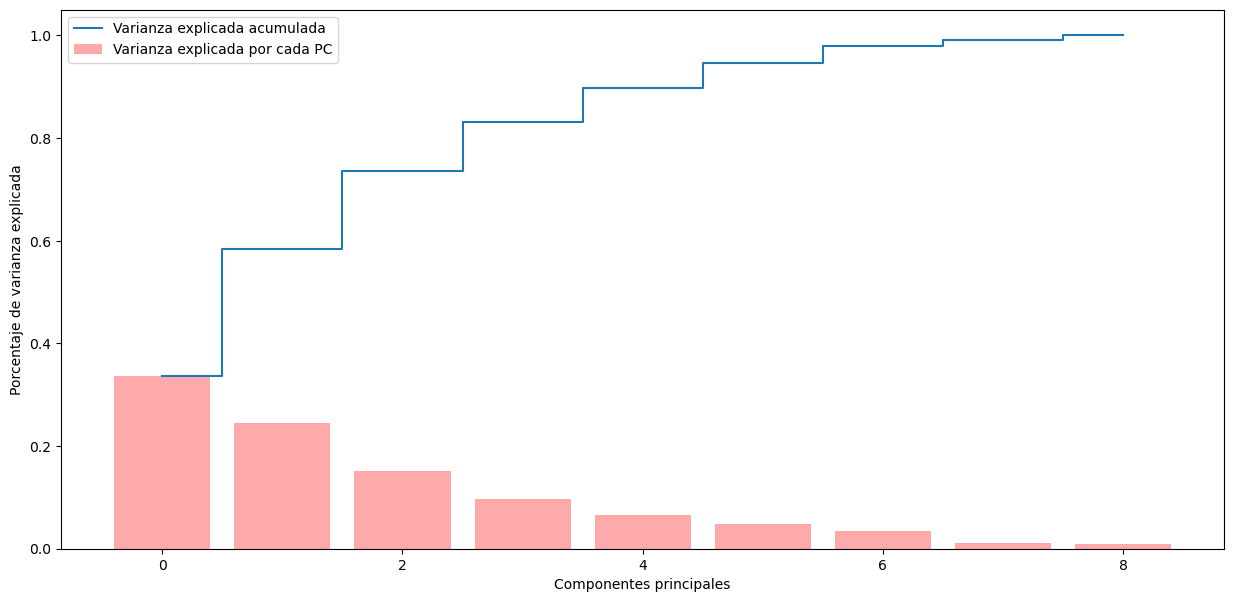

In [23]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(explain_variance)), explain_variance, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'r')
plt.step(range(len(explain_variance_cumm)), explain_variance_cumm, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

**Análisis** 

PENDIENTE - Qué puedo decir acerca de la elección de los 4 primeros componentes respecto a la elección de variables?

A continuación, se procederá a gráficar los puntos en el nuevo sistema de represetnación a partir de los componentes principales que se encontraron en los pasos anteriores. A través de la siguiente función, se graficarán los puntos de los datos y las cargas de las variables explicativas originales. 

In [33]:
import matplotlib.pyplot as plt

def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:, index1]
    ys = data[:, index2]
    n = loadings.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i, index1] * .8, loadings[i, index2] * .8, color='r', alpha=0.5)
        if labels is None:
            plt.text(loadings[i, index1] * .85, loadings[i, index2] * .85, "Var" + str(i + 1), color='black',
                     ha='center', va='center')
        else:
            plt.text(loadings[i, index1] * .85, loadings[i, index2] * .85, labels[i], color='black', ha='center',
                     va='center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(index1 + 1))
    plt.ylabel("PC{}".format(index2 + 1))
    plt.grid()




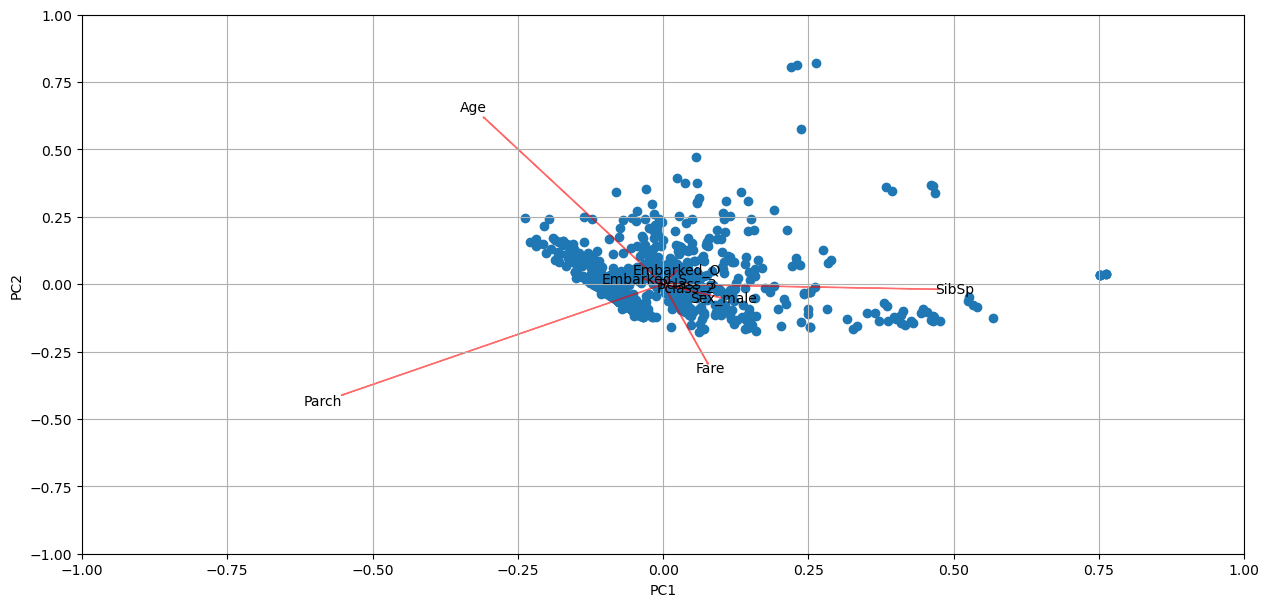

In [34]:
# Llamar a la función biplot sin etiquetas de puntos
biplot(df_proyected, pca.components_, 0, 1, df_train_PCA_Norm.columns)

**Análisis**

PENDIENTE